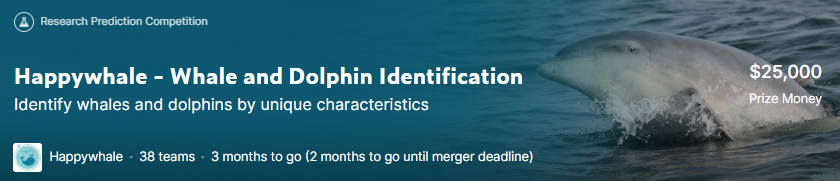

### このコンテストでは、個々のクジラとイルカを、それらの自然なマーキングのユニークな、しかししばしば微妙な特徴によって一致させるモデルを開発します

### In this competition, you’ll develop a model to match individual whales and dolphins by unique—but often subtle—characteristics of their natural markings.

# コンペ内容
### クジラ毎につけられているIDを画像とともに学習し、与えられる画像をもとにそれがどのIDのクジラか予想するコンペ

# Competition details
### A competition to learn the ID given to each whale along with its image, and to predict which ID whale it is based on the given image.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
train =True
import cv2
import matplotlib.pyplot as plt

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Train data</span>

In [ ]:
train = pd.read_csv('../input/happy-whale-and-dolphin/train.csv')
train

### ３０種類あるようです。

### There seems to be 30 types.

In [ ]:
len(train.species.unique())

In [ ]:
train.species.unique()

### individual_idはユニークかとおもいましたが、重複してますね。

### I thought the individual_id was unique, but it's a duplicate.

In [ ]:
len(train.individual_id.unique())

### どれがindividual_idで重複しているか調べると、37c7aba965a5が400個も重複している。

### Checking which ones are duplicates in individual_id, 37c7aba965a5 has 400 duplicates.

In [ ]:
train.individual_id.value_counts()

### これをみると、同じクジラが４００枚写っていることがわかる。(37c7aba965a5)

### This shows that there are 400 pictures of the same whale.(37c7aba965a5)

In [ ]:
whale = train[train.individual_id=='37c7aba965a5'].reset_index(drop=True)
whale

### このクジラの写真４００枚のうち、20枚だけ見てみましょう。

### Let's look at just 20 of the 400 photos of this whale.

In [ ]:
fig = plt.figure(figsize=(30,60))
x=1
for i in range(20): 
    fig.add_subplot(10,4, x)
    plt.title(whale.loc[i,'image'],fontsize=18)
    plt.imshow(cv2.imread('../input/happy-whale-and-dolphin/train_images/'+ str(whale.loc[i,'image'])))
    x+=1

### 人間が見ても同じかどうかわかりませんね。ちがうクジラを見てみましょう。

### I'm not sure if it's the same for humans. Let's look at a different whale.

In [ ]:
whale = train[train.individual_id=='114207cab555'].reset_index(drop=True)
whale
fig = plt.figure(figsize=(30,60))
x=1
for i in range(20): 
    fig.add_subplot(10,4, x)
    plt.title(whale.loc[i,'image'],fontsize=18)
    plt.imshow(cv2.imread('../input/happy-whale-and-dolphin/train_images/'+ str(whale.loc[i,'image'])))
    x+=1

### 気のせいかヒレの形が違うような。気のせいかな。

### I don't know if it's my imagination, but the shape of the fins seems different. I don't know if it's just my imagination.

### predictionsでindividual_idを推測して提出するコンペですね。

### This is a competition to guess and submit individual_id in predictions.

In [ ]:
sub = pd.read_csv('../input/happy-whale-and-dolphin/sample_submission.csv')
sub

### クジラの種類毎、固有IDを学習して、推測していくコンペです。大変そうです。

### This is a competition to learn and guess the unique ID of each type of whale. It looks like a lot of work.